In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/ubuntu/fastai/')
from fastai.imports import *

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
import shutil

In [5]:
PATH = "/home/ubuntu/data/football/"
sz=224

In [6]:
TEST_PATH = '/home/ubuntu/data/football/test/'
TARGET_PATH = '/home/ubuntu/target/images/'
target_files = os.listdir(TARGET_PATH)
target_files

['632616758.jpg.0.jpg']

In [7]:
for fn in target_files:
    shutil.copyfile(TARGET_PATH + fn, TEST_PATH + fn)

In [10]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test', test_with_labels=False)
learn = ConvLearner.pretrained(arch, data, precompute=False)

In [11]:
learn.load('224_all')

In [12]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy = accuracy_np(probs, y)
print(f"MODEL ACCURACY: {accuracy}")

MODEL ACCURACY: 0.9210526315789473           


[[18  1]
 [ 2 17]]


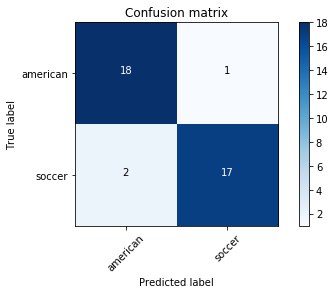

In [13]:
from sklearn.metrics import confusion_matrix
preds = np.argmax(probs, axis=1)
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [15]:
log_preds = learn.predict(data.test_dl)
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
CLASS_PREDICTION = data.classes[int(preds)]
print(f'YOUR IMAGE IS: {CLASS_PREDICTION}')

YOUR IMAGE IS: american


In [16]:
probs_american = np.exp(log_preds[:, 0])      #pr(american)
probs_soccer = np.exp(log_preds[:,1])        # pr(soccer)
print(f'AMERICAN FOOTBALL POSSIBILITY: {probs_american}')
print(f'SOCCER POSSIBILITY: {probs_soccer}')

AMERICAN FOOTBALL POSSIBILITY: [0.98536]
SOCCER POSSIBILITY: [0.01464]
